In [2]:
cd ~/../content/

/content


In [0]:
mkdir 3_cnn

In [4]:
cd 3_cnn/

/content/3_cnn


In [5]:
!wget https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz 

--2020-05-03 14:18:04--  https://commondatastorage.googleapis.com/books1000/notMNIST_small.tar.gz
Resolving commondatastorage.googleapis.com (commondatastorage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to commondatastorage.googleapis.com (commondatastorage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8458043 (8.1M) [application/x-tar]
Saving to: ‘notMNIST_small.tar.gz’

notMNIST_small.tar. 100%[===================>]   8.07M  --.-KB/s    in 0.09s   

2020-05-03 14:18:04 (94.9 MB/s) - ‘notMNIST_small.tar.gz’ saved [8458043/8458043]



In [6]:
!wget https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz 

--2020-05-03 14:18:06--  https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz
Resolving commondatastorage.googleapis.com (commondatastorage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to commondatastorage.googleapis.com (commondatastorage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247336696 (236M) [application/x-tar]
Saving to: ‘notMNIST_large.tar.gz’

notMNIST_large.tar. 100%[===================>] 235.88M   132MB/s    in 1.8s    

2020-05-03 14:18:08 (132 MB/s) - ‘notMNIST_large.tar.gz’ saved [247336696/247336696]



In [0]:
import shutil
shutil.unpack_archive("notMNIST_small.tar.gz", "./ds_small")
shutil.unpack_archive("notMNIST_large.tar.gz", "./ds_large")

In [8]:
import hashlib
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

image_dir = './ds_large'
img_height, img_width = 28, 28
s = img_height * img_width


def read_dataset(path, classes):
    X, y = [], []
    for root, _, files in os.walk(path):
        for file in files:
            try:
                im = mpimg.imread(os.path.join(root, file))
                X.append(im.reshape(s, 1))
                dir_name = os.path.basename(root)
                y.append(classes.index(dir_name))
            except Exception as ex:
                print(ex)

    x_len = len(X)
    return np.array(X).reshape(x_len, s).T, np.array(y)


def remove_duplicates(X, y, X_read_only):
    x_hashes = np.array([hashlib.sha256(img).hexdigest() for img in X])
    x_read_only_hashes = np.array([hashlib.sha256(img).hexdigest() for img in X_read_only])

    indexes_to_remove = []
    for i, h in enumerate(x_hashes):
        duplicates = np.where(x_read_only_hashes == h)
        if len(duplicates[0]):
            indexes_to_remove.append(i)

    print("Removed {} duplicates".format(len(indexes_to_remove)))

    if len(indexes_to_remove):
        return np.delete(X, indexes_to_remove, 0), np.delete(y, indexes_to_remove, 0)

    return X, y


classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
X, y = read_dataset(image_dir, classes)

X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2)
X_train, y_train = remove_duplicates(X_train, y_train, X_test)

X_train, X_test = X_train.reshape((-1, img_height, img_width, 1)), X_test.reshape((-1, img_height, img_width, 1))
print(X_train.shape, X_test.shape)

y_train, y_test = y_train.T, y_test.T
print(y_train.shape, y_test.shape)

read past end of file
read past end of file
read past end of file
read past end of file
invalid PNG header
Removed 28705 duplicates
(394586, 28, 28, 1) (105823, 28, 28, 1)
(394586,) (105823,)


In [0]:
def plot_accuracy(fit_hist):
    epoch_count = len(fit_hist.history['accuracy'])
    plt.plot(np.arange(1, epoch_count + 1), fit_hist.history['accuracy'], label="Train")
    plt.plot(np.arange(1, epoch_count + 1), fit_hist.history['val_accuracy'], label="Val")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

Задание 1.
Реализуйте нейронную сеть с двумя сверточными слоями, и одним полносвязным с нейронами с кусочно-линейной функцией активации. Какова точность построенное модели?


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,394
Trainable params: 63,394
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
617/617 [==============================] - 8s 13ms/step - loss: 0.5636 - accuracy: 0.8483 - val_loss: 0.4529 - val_accuracy: 0.8771
Epoch 2/25
617/617 [==============================] - 8s 13ms/step - loss: 0.4330 - accuracy: 0.8818 - val_

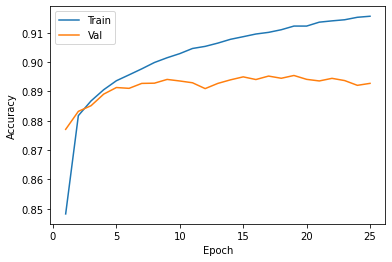

3307/3307 [==============================] - 8s 3ms/step - loss: 0.3980 - accuracy: 0.8965


[0.3979744017124176, 0.89645916223526]

In [10]:
batch_size = 512
validation_split = 0.2
epochs = 25

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(img_width, img_height, 1)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), padding="same", activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
fit_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
plot_accuracy(fit_history)

model.evaluate(X_test, y_test)

As you can see, the model is overfitted. Accuracy = 89.6%

Задание 2.
Замените один из сверточных слоев на слой, реализующий операцию пулинга (Pooling) с функцией максимума или среднего. Как это повлияло на точность классификатора?


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 15,770
Trainable params: 15,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
617/617 [==============================] - 5s 8ms/step - loss: 0.6443 - accuracy: 0.8272 - val_loss: 0.5106 - val_accuracy: 0.8617
Epoch 2/25
617/617 [==============================] - 4s 7ms/step - loss: 0.4883 - accuracy: 0.8674 - val_

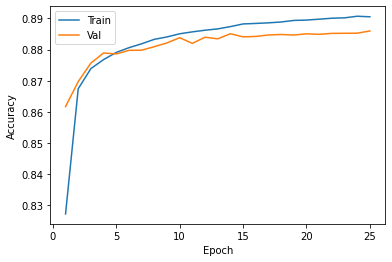

3307/3307 [==============================] - 7s 2ms/step - loss: 0.4183 - accuracy: 0.8894


[0.4183320105075836, 0.8893624544143677]

In [11]:
batch_size = 512
validation_split = 0.2
epochs = 25

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(img_width, img_height, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
fit_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
plot_accuracy(fit_history)

model.evaluate(X_test, y_test)

The model with a max-pooling layer has fitted two times faster, but accuracy is about the same value (-0.6%). Accuracy = 89%

Реализуйте классическую архитектуру сверточных сетей LeNet-5 (http://yann.lecun.com/exdb/lenet/).

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

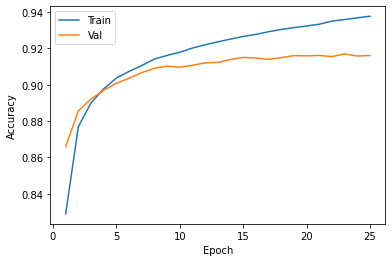

3307/3307 [==============================] - 8s 2ms/step - loss: 0.2848 - accuracy: 0.9181


[0.2847743034362793, 0.9180707335472107]

In [12]:
batch_size = 512
validation_split = 0.2
epochs = 25

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), padding="same", activation=tf.nn.tanh, input_shape=(img_height, img_width, 1)), # 'same' padding as we need 28x28 output 
        tf.keras.layers.AveragePooling2D(), # default 2x2
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation=tf.nn.tanh),
        tf.keras.layers.AveragePooling2D(),
        tf.keras.layers.Flatten(),        
        tf.keras.layers.Dense(120, activation=tf.nn.tanh),
        tf.keras.layers.Dense(84, activation=tf.nn.tanh),
        tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
fit_history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
plot_accuracy(fit_history)

model.evaluate(X_test, y_test)

The model is slighly overfitted. Current accuracy is 91.81%

Сравните максимальные точности моделей, построенных в лабораторных работах 1-3. Как можно объяснить полученные различия?


CNN - 91.81%

Fully connected NN - 90.8%

Classifier - 81%.

CNN shows the best accuracy because it can highlight the main features in images and fit the network using these features. 

Full connected NN shows a bit worse result comparing to CNN. It also is able to highlight mostly main features, but because of lots of connections, these features can be blurred and minor ones can stand out. That's why we are getting overfitting.

A simple classifire can't highlight main features as NN does it, that's why we need more data to increase its accuracy.